In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

--- Loading Breast Cancer Dataset ---
Data split complete. Training samples: 455, Testing samples: 114


d:\College\YEAR3\NNDL\lab programs\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)


Model compiled with 'binary_crossentropy' loss and 'adam' optimizer.

--- Training the Model ---
Training complete.

--- Plotting Model Performance ---


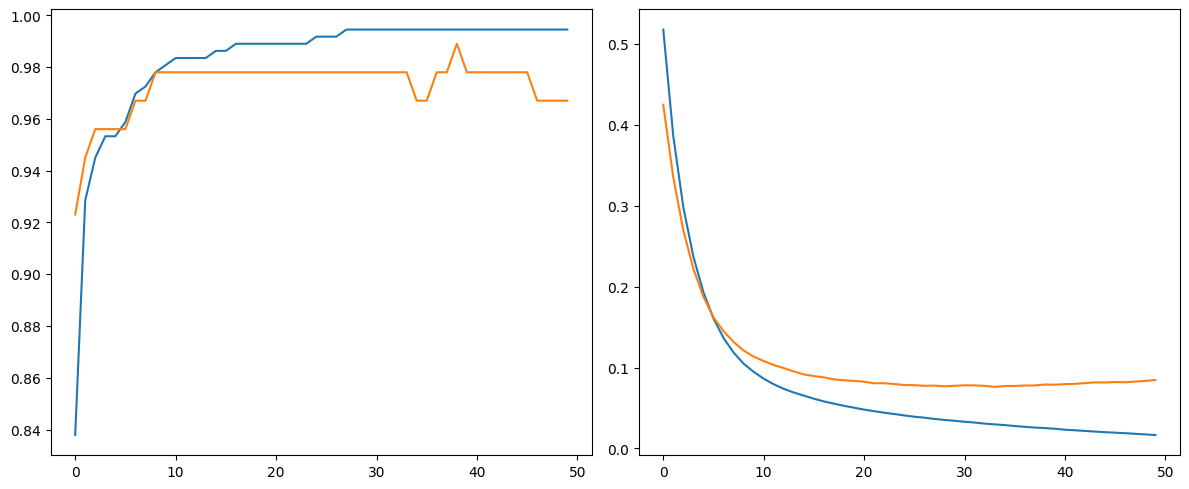


--- Evaluating on Test Data ---
Test Accuracy: 98.25%
Test Loss: 0.0746
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

--- Classification Report ---
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [8]:
# 1. LOAD DATASET (1 Mark)

print("--- Loading Breast Cancer Dataset ---")
data = load_breast_cancer()
X, y = data.data, data.target

# 2. SPLIT INTO TEST/TRAIN (1 Mark)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Data split complete. Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# 3. ANN MODEL TRAINING (2 Marks)

# Define the model architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)), # Hidden Layer 1
    Dense(16, activation='relu'),                                # Hidden Layer 2
    Dense(1, activation='sigmoid')                               # Output Layer for binary classification
])
model.summary()

# 4. LOSS FUNCTION & COMPILATION (2 Marks)

# Compile the model with loss function, optimizer, and metrics
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
print("\nModel compiled with 'binary_crossentropy' loss and 'adam' optimizer.")

# Train the model (fit the data)
print("\n--- Training the Model ---")
history = model.fit(X_train, y_train,validation_split=0.2,epochs=50, batch_size=32,verbose=0) # verbose=0 silences the per-epoch output
print("Training complete.")

# 5. LOSS AND ACCURACY PLOT (2 Marks)

print("\n--- Plotting Model Performance ---")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])

plt.tight_layout()
plt.show()

# 6. FINAL PREDICTION (2 Marks)

print("\n--- Evaluating on Test Data ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten() # Convert probabilities to binary classes (0 or 1)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=data.target_names))

--- Loading California Housing Dataset ---
Data split complete. Training samples: 16512, Testing samples: 4128

--- Model Summary ---


d:\College\YEAR3\NNDL\lab programs\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)


Model compiled with 'mean_squared_error' loss and 'adam' optimizer.

--- Training the Model ---
Training complete.

--- Plotting Model Performance ---


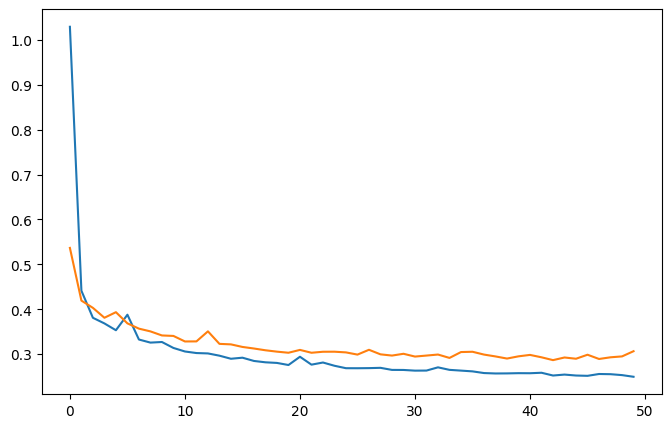


--- Evaluating on Test Data ---
Test Mean Squared Error: 0.3037
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
R-squared (R²) Score: 0.7683


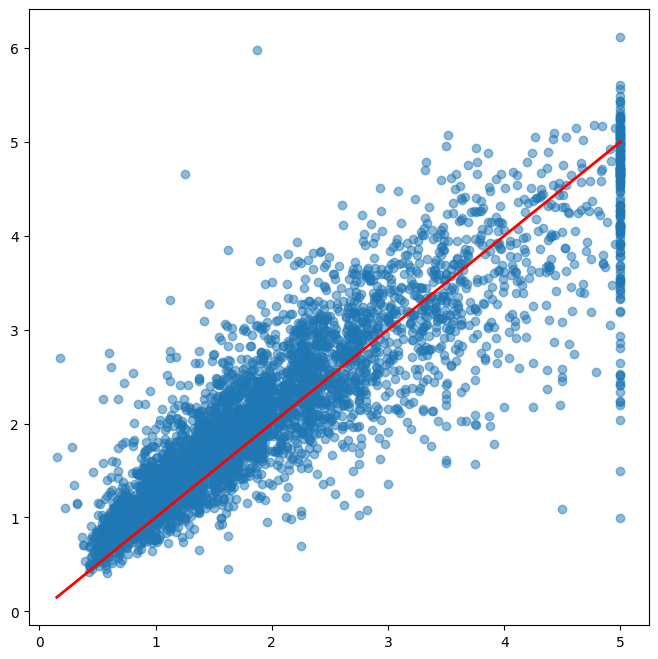

In [9]:

# 1. LOAD DATASET (1 Mark)

print("--- Loading California Housing Dataset ---")
housing = fetch_california_housing()
X, y = housing.data, housing.target


# 2. SPLIT INTO TEST/TRAIN (1 Mark)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Data split complete. Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


# 3. ANN MODEL TRAINING (2 Marks)

# Define the model architecture
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Hidden Layer 1
    Dense(32, activation='relu'),                                  # Hidden Layer 2
    Dense(1)                                                       # Output Layer for regression (linear activation)
])
print("\n--- Model Summary ---")
model_reg.summary()


# 4. LOSS FUNCTION & COMPILATION (2 Marks)

# Compile the model with loss function, optimizer, and metrics
model_reg.compile(optimizer='adam',loss='mean_squared_error') # Common loss function for regression
print("\nModel compiled with 'mean_squared_error' loss and 'adam' optimizer.")

# Train the model (fit the data)
print("\n--- Training the Model ---")
history_reg = model_reg.fit(X_train, y_train,validation_split=0.2,epochs=50, batch_size=32,verbose=0) # verbose=0 silences the per-epoch output
print("Training complete.")


# 5. LOSS PLOT (2 Marks)

print("\n--- Plotting Model Performance ---")
plt.figure(figsize=(8, 5))
plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_loss'])
plt.show()

# 6. FINAL PREDICTION (2 Marks)

print("\n--- Evaluating on Test Data ---")
test_loss = model_reg.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Squared Error: {test_loss:.4f}")

# Make predictions
y_pred = model_reg.predict(X_test).flatten()

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2:.4f}")

# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2) # Ideal prediction line
plt.show()